In [1]:
import polars as pl
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pl.read_csv("../data/mitbih_train.csv", has_header=False)
data = data.rename({"column_188": "label"})

data.describe()

statistic,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_152,column_153,column_154,column_155,column_156,column_157,column_158,column_159,column_160,column_161,column_162,column_163,column_164,column_165,column_166,column_167,column_168,column_169,column_170,column_171,column_172,column_173,column_174,column_175,column_176,column_177,column_178,column_179,column_180,column_181,column_182,column_183,column_184,column_185,column_186,column_187,label
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,…,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.89036,0.75816,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,0.198778,0.20355,0.208776,0.212885,0.218393,0.224966,0.231377,0.237123,0.242582,0.247923,0.253749,0.259748,0.266244,0.272734,0.279355,0.285588,0.291808,0.297672,0.303384,0.308795,0.31389,0.318454,0.322087,0.324891,0.326737,0.327817,…,0.027573,0.026875,0.025771,0.024823,0.023932,0.02306,0.022458,0.021809,0.021245,0.020623,0.020026,0.019534,0.019053,0.018592,0.017664,0.01674,0.015722,0.014402,0.013024,0.011625,0.010262,0.008929,0.008056,0.007278,0.006531,0.005981,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
"""std""",0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.17724,0.171778,0.168357,0.171796,0.176496,0.180274,0.184101,0.186963,0.190002,0.193899,0.198465,0.202855,0.207166,0.211187,0.214821,0.21845,0.221486,0.224031,0.225848,0.227133,0.22783,0.228436,0.228871,0.22876,0.228393,0.227472,0.22618,0.224659,0.22311,…,0.111103,0.110513,0.108566,0.106493,0.104591,0.102658,0.101395,0.100201,0.099386,0.098327,0.096635,0.095729,0.095368,0.095055,0.092902,0.091118,0.088574,0.084638,0.079949,0.075307,0.069892,0.063994,0.060074,0.056404,0.05284,0.050006,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065,0.068638,0.070539,0.069182,0.068293,0.067742,0.070175,0.072993,0.074803,0.075972,0.076923,0.077869,0.079439,0.081911,0.0859375,0.090032,0.094595,0.098901,0.10396,0.109339,0.114754,0.120729,0.127946,0.135961,0.144295,0.151852,0.157895,0.161034,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [3]:
train_data = pl.read_csv("../data/mitbih_train.csv", has_header=False)
train_data = train_data.rename({"column_188": "label"})

test_data = pl.read_csv("../data/mitbih_test.csv", has_header=False)
test_data = test_data.rename({"column_188": "label"})

In [4]:
normal_sample = data.filter(pl.col("label") == 0).sample(1)
atrial_premature_sample = data.filter(pl.col("label") == 1).sample(1)
ventricular_premature_sample = data.filter(pl.col("label") == 2).sample(1)
fusion_sample = data.filter(pl.col("label") == 3).sample(1)
paced_sample = data.filter(pl.col("label") == 4).sample(1)

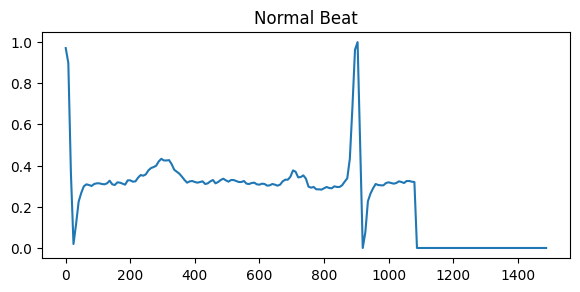

In [5]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=normal_sample.drop("label").to_numpy().flatten())
plt.title("Normal Beat")
plt.show()

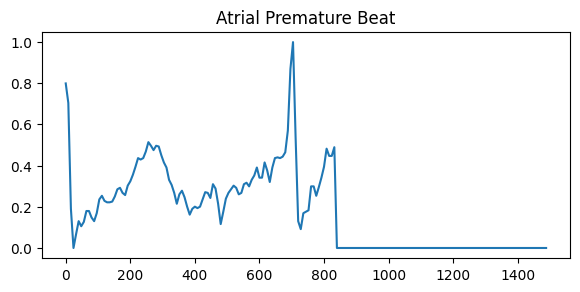

In [6]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=atrial_premature_sample.drop("label").to_numpy().flatten())
plt.title("Atrial Premature Beat")
plt.show()

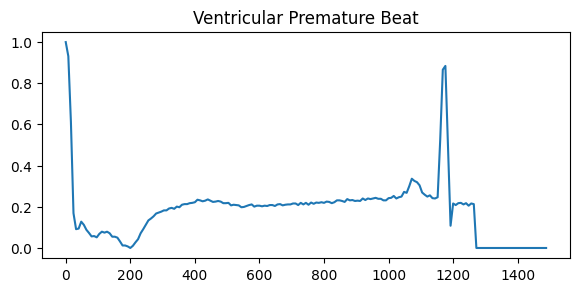

In [7]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=ventricular_premature_sample.drop("label").to_numpy().flatten())
plt.title("Ventricular Premature Beat")
plt.show()

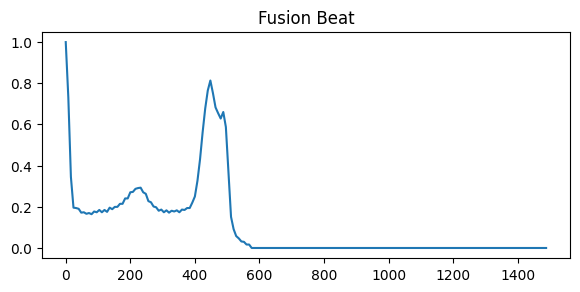

In [8]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=fusion_sample.drop("label").to_numpy().flatten())
plt.title("Fusion Beat")
plt.show()

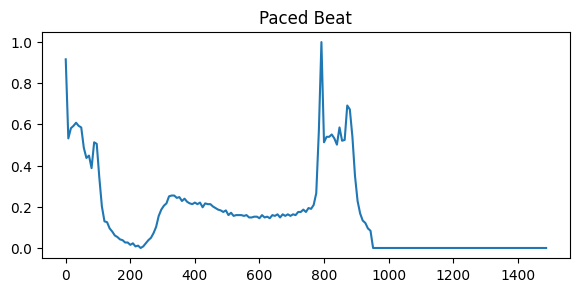

In [9]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=paced_sample.drop("label").to_numpy().flatten())
plt.title("Paced Beat")
plt.show()

# Performance


In [10]:
results = pl.read_csv("../ecg_model_performance_results.csv")
results_grouped = results.group_by(["model_type", "num_conv_layers"]).agg(
    [
        pl.mean("test_accuracy").alias("mean_test_accuracy"),
        pl.mean("test_loss").alias("mean_test_loss"),
        pl.mean("f1_macro").alias("mean_f1_macro"),
        pl.mean("precision_macro").alias("mean_precision_macro"),
        pl.mean("recall_macro").alias("mean_recall_macro"),
        pl.mean("roc_auc_ovr").alias("mean_roc_auc_ovr"),
        pl.mean("roc_auc_ovo").alias("mean_roc_auc_ovo"),
    ]
)
results_grouped

model_type,num_conv_layers,mean_test_accuracy,mean_test_loss,mean_f1_macro,mean_precision_macro,mean_recall_macro,mean_roc_auc_ovr,mean_roc_auc_ovo
str,i64,f64,f64,f64,f64,f64,f64,f64
"""ECGCNN""",5,0.894857,0.313469,0.70531,0.646023,0.887265,0.97722,0.983614
"""ECGCNN_VGG""",4,0.870674,0.397537,0.665696,0.610135,0.869996,0.969921,0.979043
"""ECGCNN_VGG""",2,0.824584,0.513825,0.616346,0.560001,0.84796,0.959977,0.973167
"""ECGCNN_VGG""",1,0.749196,0.643692,0.547893,0.500268,0.815287,0.948827,0.964796
"""ECGCNN""",1,0.771158,0.614664,0.563986,0.514439,0.822834,0.950711,0.966504
"""ECGCNN""",4,0.864489,0.395183,0.664766,0.611117,0.880541,0.974517,0.982163
"""ECGCNN""",2,0.806203,0.512694,0.607488,0.559138,0.850072,0.960267,0.972098
"""ECGCNN_VGG""",5,0.877663,0.40527,0.673441,0.614724,0.874075,0.972223,0.980923
"""ECGCNN""",3,0.883848,0.380753,0.678975,0.620731,0.881624,0.973188,0.981069


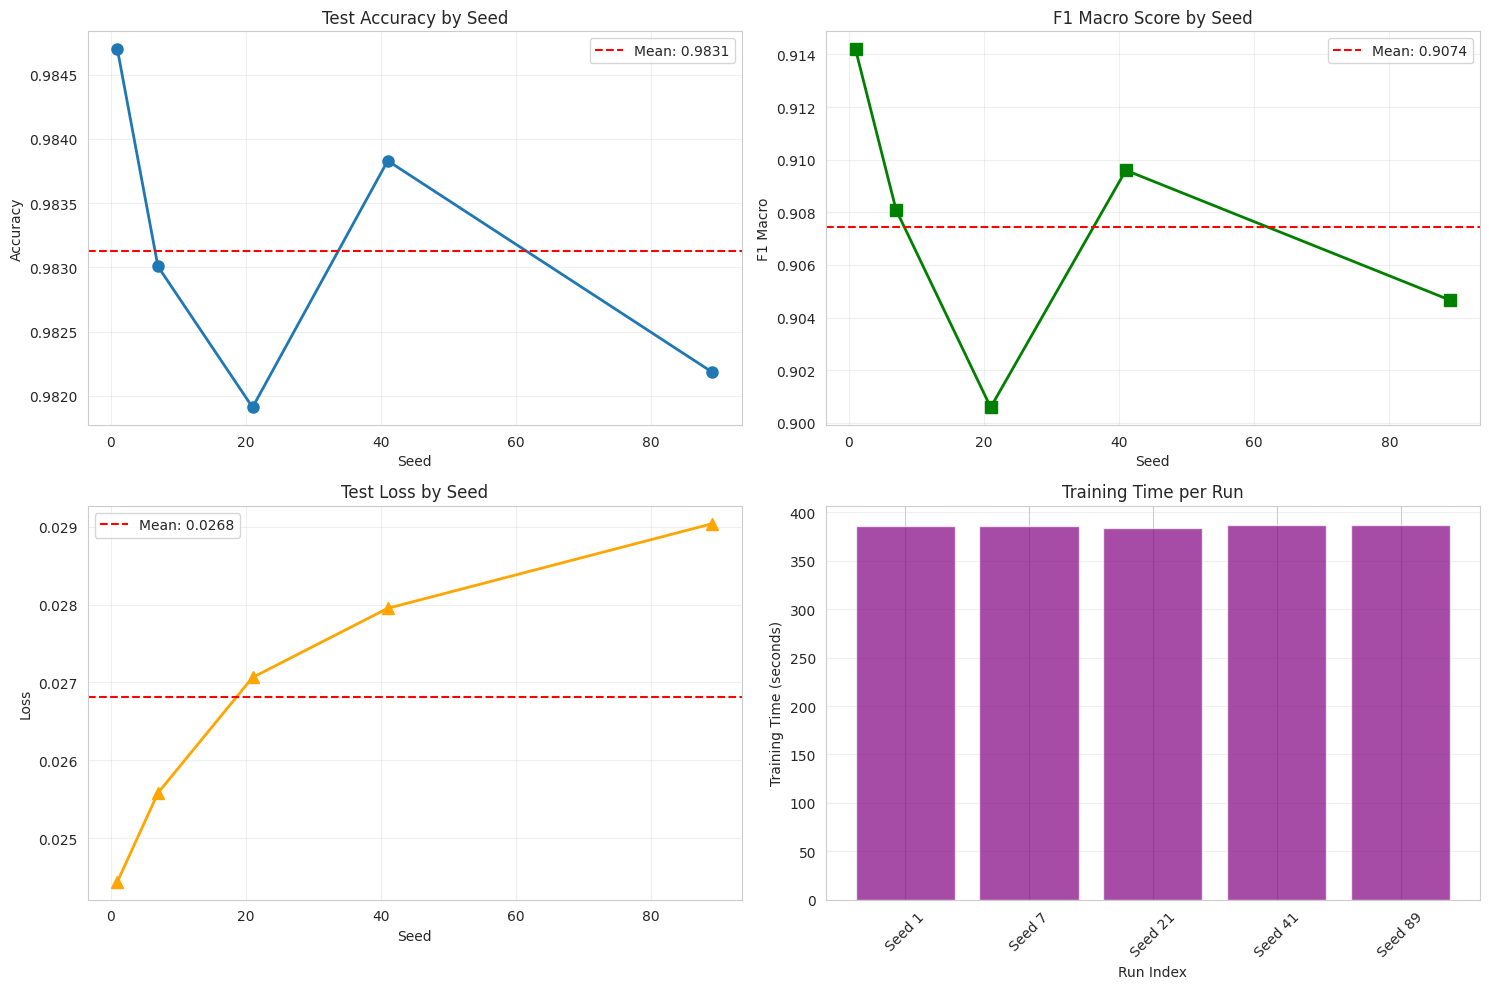

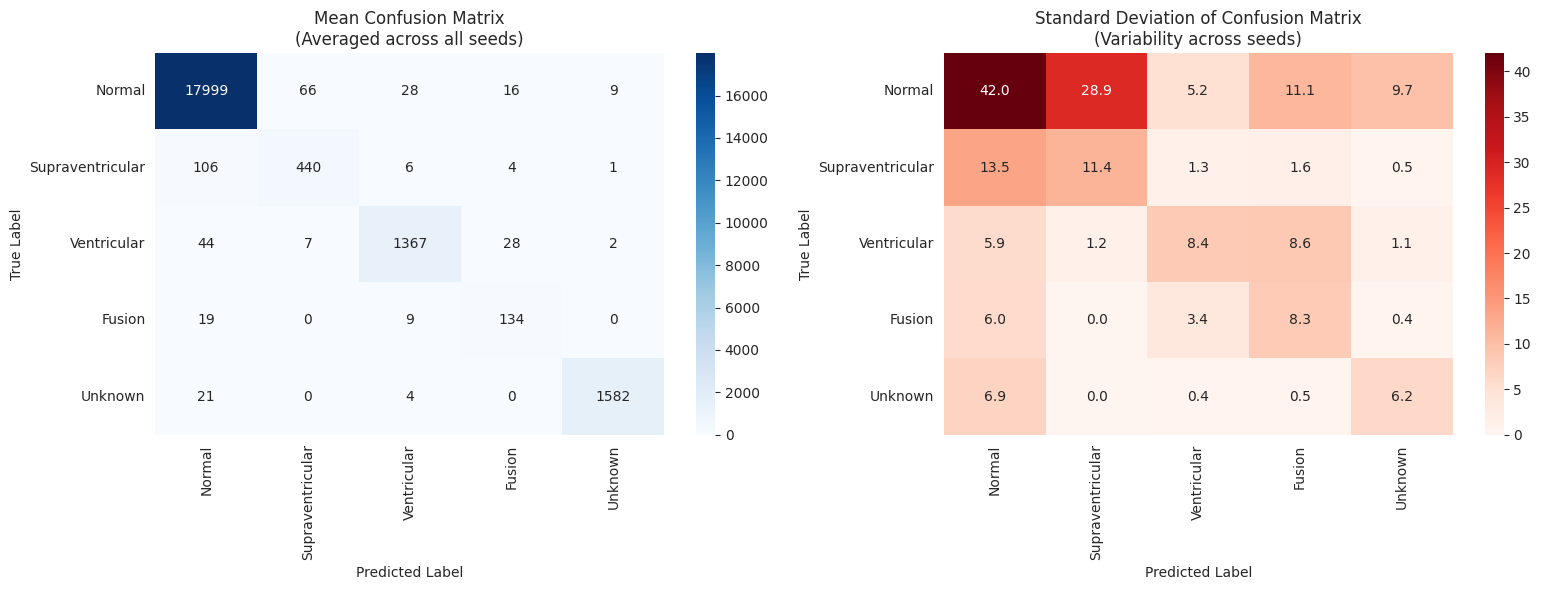

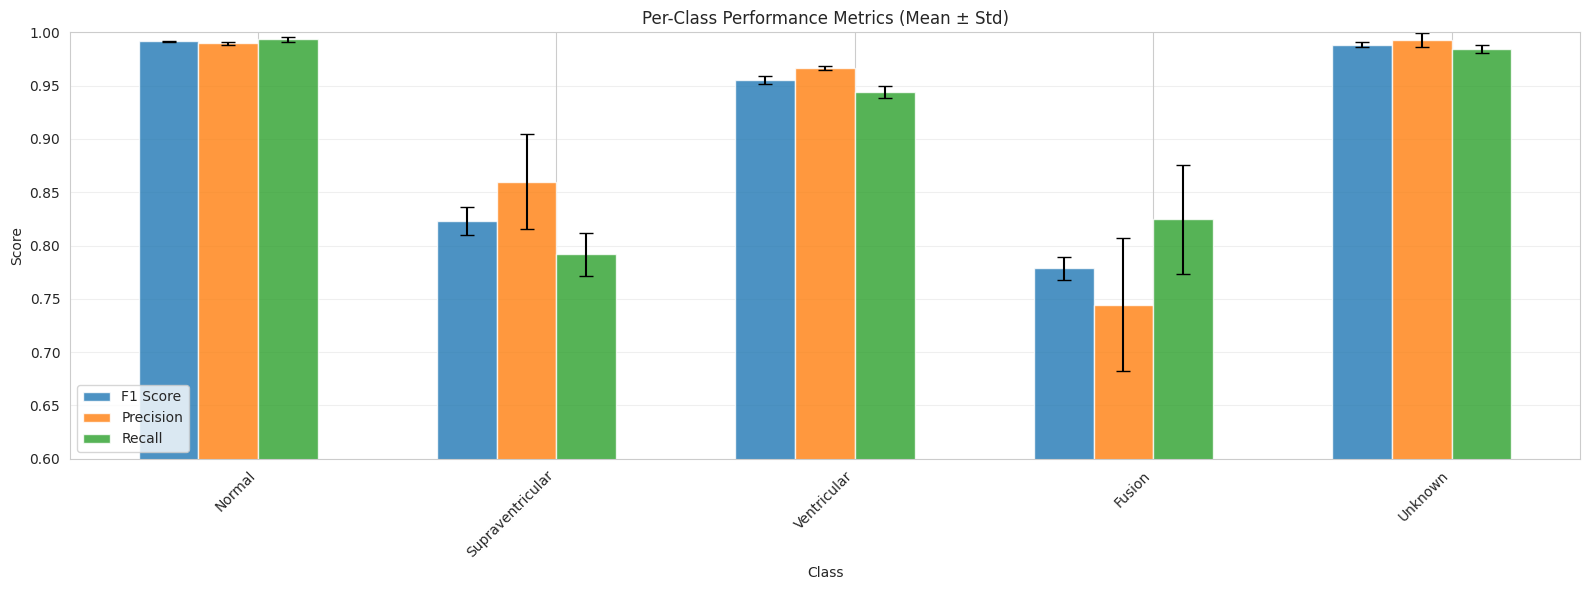

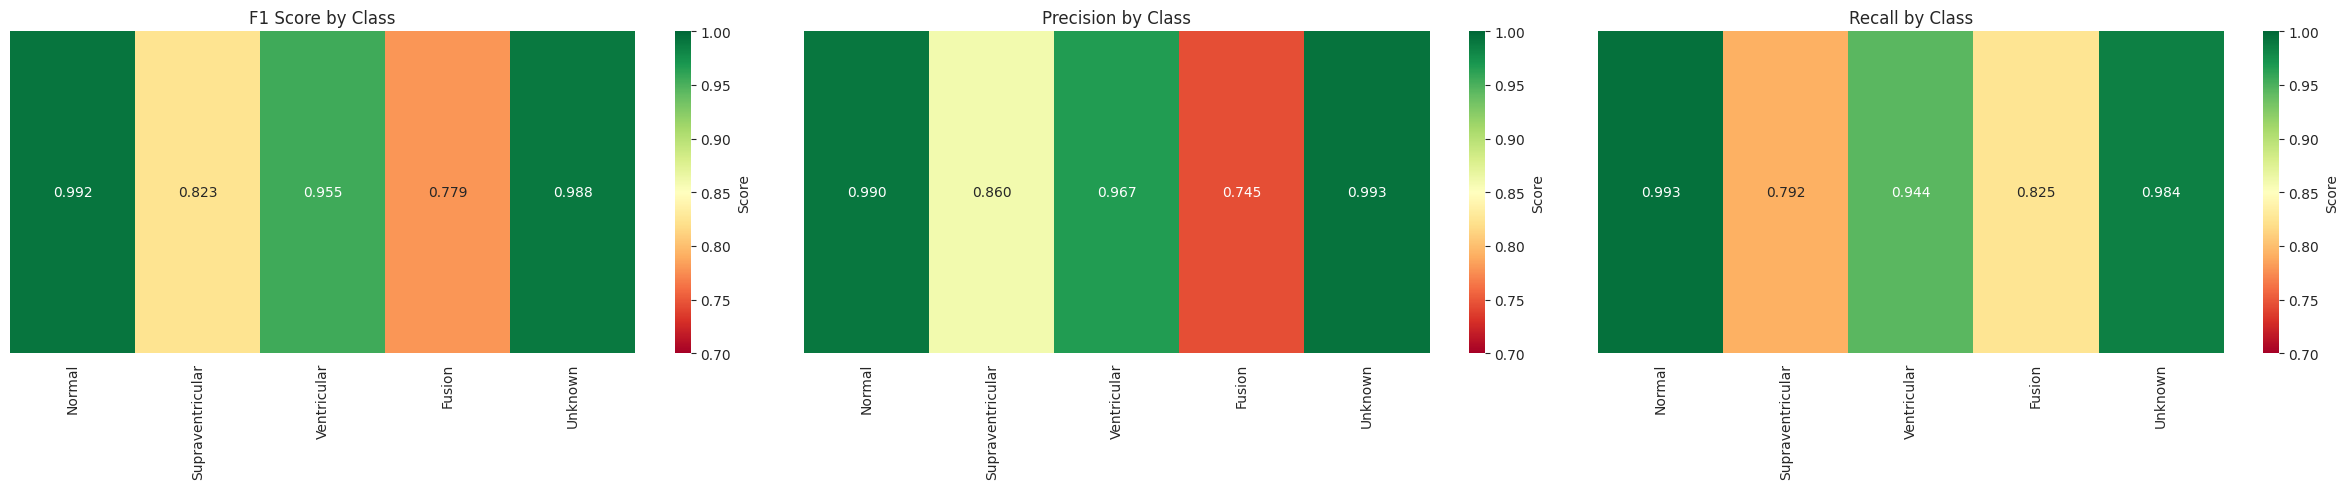

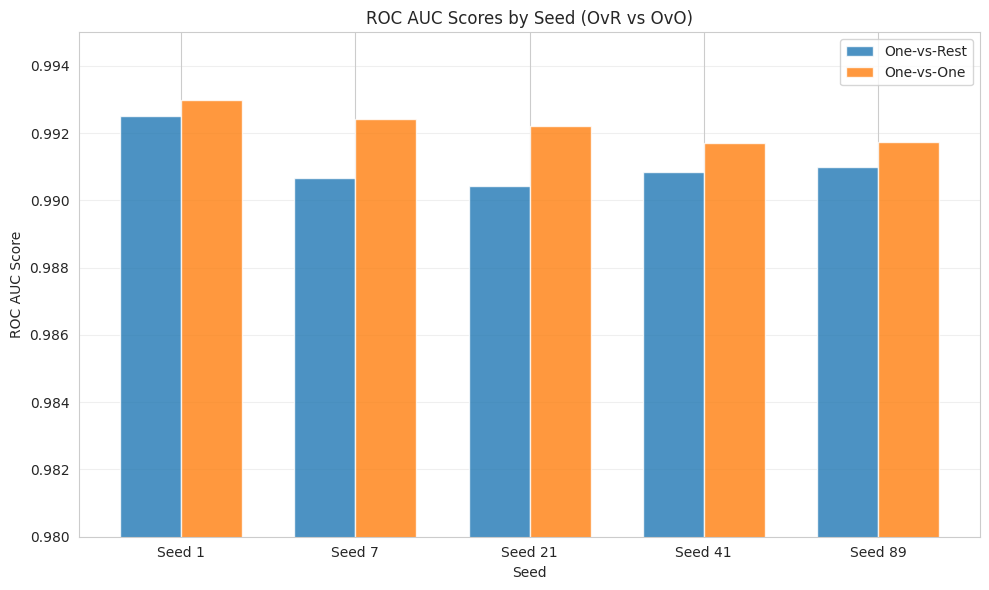


SUMMARY STATISTICS
           Metric       Mean      Std        Min        Max
         Accuracy   0.983126 0.001033   0.981911   0.984698
         F1 Macro   0.907429 0.004592   0.900590   0.914200
        Precision   0.910794 0.020090   0.885517   0.943468
           Recall   0.907602 0.011672   0.888677   0.919845
      Specificity   0.988250 0.000875   0.987159   0.989256
             Loss   0.026816 0.001641   0.024441   0.029039
    ROC AUC (OvR)   0.991100 0.000734   0.990440   0.992518
    ROC AUC (OvO)   0.992214 0.000474   0.991698   0.992979
Training Time (s) 386.085245 1.163916 384.147738 387.456534

PER-CLASS METRICS
           Class F1 (mean±std) Precision (mean±std) Recall (mean±std)
          Normal   0.992±0.001          0.990±0.001       0.993±0.002
Supraventricular   0.823±0.013          0.860±0.044       0.792±0.021
     Ventricular   0.955±0.004          0.967±0.002       0.944±0.006
          Fusion   0.779±0.011          0.745±0.062       0.825±0.051
         Un

In [13]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
with open("../metrics.json", "r") as f:
    metrics_data = json.load(f)

# Set style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 10)

# Extract data for easier manipulation
seeds = [entry["seed"] for entry in metrics_data]
accuracies = [entry["metrics"]["accuracy"] for entry in metrics_data]
f1_macros = [entry["metrics"]["f1_macro"] for entry in metrics_data]
losses = [entry["metrics"]["avg_loss"] for entry in metrics_data]
training_times = [entry["training_time"] for entry in metrics_data]

class_names = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"]

# 1. Overall Performance Metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(seeds, accuracies, marker="o", linewidth=2, markersize=8)
axes[0, 0].set_xlabel("Seed")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_title("Test Accuracy by Seed")
axes[0, 0].axhline(
    y=np.mean(accuracies),
    color="r",
    linestyle="--",
    label=f"Mean: {np.mean(accuracies):.4f}",
)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(seeds, f1_macros, marker="s", linewidth=2, markersize=8, color="green")
axes[0, 1].set_xlabel("Seed")
axes[0, 1].set_ylabel("F1 Macro")
axes[0, 1].set_title("F1 Macro Score by Seed")
axes[0, 1].axhline(
    y=np.mean(f1_macros),
    color="r",
    linestyle="--",
    label=f"Mean: {np.mean(f1_macros):.4f}",
)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(seeds, losses, marker="^", linewidth=2, markersize=8, color="orange")
axes[1, 0].set_xlabel("Seed")
axes[1, 0].set_ylabel("Loss")
axes[1, 0].set_title("Test Loss by Seed")
axes[1, 0].axhline(
    y=np.mean(losses), color="r", linestyle="--", label=f"Mean: {np.mean(losses):.4f}"
)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].bar(range(len(seeds)), training_times, color="purple", alpha=0.7)
axes[1, 1].set_xlabel("Run Index")
axes[1, 1].set_ylabel("Training Time (seconds)")
axes[1, 1].set_title("Training Time per Run")
axes[1, 1].set_xticks(range(len(seeds)))
axes[1, 1].set_xticklabels([f"Seed {s}" for s in seeds], rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# 2. Aggregate Confusion Matrix
confusion_matrices = [
    np.array(entry["metrics"]["confusion_matrix"]) for entry in metrics_data
]
mean_cm = np.mean(confusion_matrices, axis=0)
std_cm = np.std(confusion_matrices, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mean confusion matrix
sns.heatmap(
    mean_cm,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    ax=axes[0],
)
axes[0].set_title("Mean Confusion Matrix\n(Averaged across all seeds)")
axes[0].set_ylabel("True Label")
axes[0].set_xlabel("Predicted Label")

# Std confusion matrix
sns.heatmap(
    std_cm,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    xticklabels=class_names,
    yticklabels=class_names,
    ax=axes[1],
)
axes[1].set_title("Standard Deviation of Confusion Matrix\n(Variability across seeds)")
axes[1].set_ylabel("True Label")
axes[1].set_xlabel("Predicted Label")

plt.tight_layout()
plt.show()

# 3. Per-Class Performance
f1_per_class = np.array([entry["metrics"]["f1_per_class"] for entry in metrics_data])
precision_per_class = np.array(
    [entry["metrics"]["precision_per_class"] for entry in metrics_data]
)
recall_per_class = np.array(
    [entry["metrics"]["recall_per_class"] for entry in metrics_data]
)

mean_f1 = np.mean(f1_per_class, axis=0)
std_f1 = np.std(f1_per_class, axis=0)
mean_precision = np.mean(precision_per_class, axis=0)
std_precision = np.std(precision_per_class, axis=0)
mean_recall = np.mean(recall_per_class, axis=0)
std_recall = np.std(recall_per_class, axis=0)

x = np.arange(len(class_names))
width = 0.2

fig, ax = plt.subplots(figsize=(16, 6))

bars1 = ax.bar(
    x - 1.5 * width, mean_f1, width, yerr=std_f1, label="F1 Score", capsize=5, alpha=0.8
)
bars2 = ax.bar(
    x - 0.5 * width,
    mean_precision,
    width,
    yerr=std_precision,
    label="Precision",
    capsize=5,
    alpha=0.8,
)
bars3 = ax.bar(
    x + 0.5 * width,
    mean_recall,
    width,
    yerr=std_recall,
    label="Recall",
    capsize=5,
    alpha=0.8,
)

ax.set_xlabel("Class")
ax.set_ylabel("Score")
ax.set_title("Per-Class Performance Metrics (Mean ± Std)")
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha="right")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.6, 1.0])

plt.tight_layout()
plt.show()

# 4. Per-Class Performance Heatmap
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

metrics_dict = {
    "F1 Score": mean_f1,
    "Precision": mean_precision,
    "Recall": mean_recall,
}

for idx, (metric_name, values) in enumerate(metrics_dict.items()):
    # Reshape for heatmap
    data = values.reshape(1, -1)
    sns.heatmap(
        data,
        annot=True,
        fmt=".3f",
        cmap="RdYlGn",
        xticklabels=class_names,
        yticklabels=[""],
        ax=axes[idx],
        vmin=0.7,
        vmax=1.0,
        cbar_kws={"label": "Score"},
    )
    axes[idx].set_title(f"{metric_name} by Class")

plt.tight_layout()
plt.show()

# 5. ROC AUC Comparison
roc_auc_ovr = [entry["metrics"]["roc_auc_ovr"] for entry in metrics_data]
roc_auc_ovo = [entry["metrics"]["roc_auc_ovo"] for entry in metrics_data]

fig, ax = plt.subplots(figsize=(10, 6))

x_pos = np.arange(len(seeds))
width = 0.35

bars1 = ax.bar(x_pos - width / 2, roc_auc_ovr, width, label="One-vs-Rest", alpha=0.8)
bars2 = ax.bar(x_pos + width / 2, roc_auc_ovo, width, label="One-vs-One", alpha=0.8)

ax.set_xlabel("Seed")
ax.set_ylabel("ROC AUC Score")
ax.set_title("ROC AUC Scores by Seed (OvR vs OvO)")
ax.set_xticks(x_pos)
ax.set_xticklabels([f"Seed {s}" for s in seeds])
ax.legend()
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.98, 0.995])

plt.tight_layout()
plt.show()

# 6. Summary Statistics Table
summary_stats = pd.DataFrame(
    {
        "Metric": [
            "Accuracy",
            "F1 Macro",
            "Precision",
            "Recall",
            "Specificity",
            "Loss",
            "ROC AUC (OvR)",
            "ROC AUC (OvO)",
            "Training Time (s)",
        ],
        "Mean": [
            np.mean(accuracies),
            np.mean(f1_macros),
            np.mean([entry["metrics"]["precision_macro"] for entry in metrics_data]),
            np.mean([entry["metrics"]["recall_macro"] for entry in metrics_data]),
            np.mean([entry["metrics"]["specificity_macro"] for entry in metrics_data]),
            np.mean(losses),
            np.mean(roc_auc_ovr),
            np.mean(roc_auc_ovo),
            np.mean(training_times),
        ],
        "Std": [
            np.std(accuracies),
            np.std(f1_macros),
            np.std([entry["metrics"]["precision_macro"] for entry in metrics_data]),
            np.std([entry["metrics"]["recall_macro"] for entry in metrics_data]),
            np.std([entry["metrics"]["specificity_macro"] for entry in metrics_data]),
            np.std(losses),
            np.std(roc_auc_ovr),
            np.std(roc_auc_ovo),
            np.std(training_times),
        ],
        "Min": [
            np.min(accuracies),
            np.min(f1_macros),
            np.min([entry["metrics"]["precision_macro"] for entry in metrics_data]),
            np.min([entry["metrics"]["recall_macro"] for entry in metrics_data]),
            np.min([entry["metrics"]["specificity_macro"] for entry in metrics_data]),
            np.min(losses),
            np.min(roc_auc_ovr),
            np.min(roc_auc_ovo),
            np.min(training_times),
        ],
        "Max": [
            np.max(accuracies),
            np.max(f1_macros),
            np.max([entry["metrics"]["precision_macro"] for entry in metrics_data]),
            np.max([entry["metrics"]["recall_macro"] for entry in metrics_data]),
            np.max([entry["metrics"]["specificity_macro"] for entry in metrics_data]),
            np.max(losses),
            np.max(roc_auc_ovr),
            np.max(roc_auc_ovo),
            np.max(training_times),
        ],
    }
)

print("\n" + "=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
print(summary_stats.to_string(index=False))
print("=" * 80)

# 7. Per-Class Metrics Table
per_class_df = pd.DataFrame(
    {
        "Class": class_names,
        "F1 (mean±std)": [f"{m:.3f}±{s:.3f}" for m, s in zip(mean_f1, std_f1)],
        "Precision (mean±std)": [
            f"{m:.3f}±{s:.3f}" for m, s in zip(mean_precision, std_precision)
        ],
        "Recall (mean±std)": [
            f"{m:.3f}±{s:.3f}" for m, s in zip(mean_recall, std_recall)
        ],
    }
)

print("\n" + "=" * 80)
print("PER-CLASS METRICS")
print("=" * 80)
print(per_class_df.to_string(index=False))
print("=" * 80)

In [12]:
# Visualize confusion matrices for a specific configuration
def plot_confusion_matrix(cm, title, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".0f",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


class_names = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"]

# Plot for best performing configuration
best_result = max(aggregated_results, key=lambda x: x["mean_f1_per_class"].mean())
plot_confusion_matrix(
    best_result["mean_confusion_matrix"],
    f"{best_result['model_type']} (Layers={best_result['num_conv_layers']})",
    class_names,
)

NameError: name 'aggregated_results' is not defined